In [2]:
import tensorflow as tf
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# police des titres
plt.rc('font', family='serif', size='18')
from IPython.display import display,Markdown
# IA
import sklearn as sk
import tensorflow as tf

In [3]:
_uid_ = 12345
def serie_temp(N,a0=1.0,a1=0.5,a2 = 0.4, a3=0.1):
    # data / jours 
    np.random.seed(_uid_)
    # time series
    Ts = np.array([x for x in np.arange(N)],dtype=int)
    ys = [ a0*np.sin(2*np.pi*x/180) + a1*np.cos(2*np.pi*x/15) \
         + a2*x/360  for x in range(N)] + \
           a3*np.random.normal(size=N,scale=0.2)
    return Ts,ys

In [4]:
# construction serie temporelle
# cas periodique le plus simple
Ts,ys = serie_temp(1000,a0=0,a1=0.5,a2=0.0,a3 = 0.)
# cas bi-periodique 
#Ts,ys = serie_temp(1000,a0=1.0,a1=0.5,a2=0.0,a3=0.0)
# + tendance 
#Ts,ys = serie_temp(1000,a0=1.0,a1=0.5,a2=0.2,a3=0.0)
# + bruit
Ts,ys = serie_temp(1000,a0=1.0,a1=0.5,a2=0.2,a3=0.3)

Text(0.5, 0, 'jour')

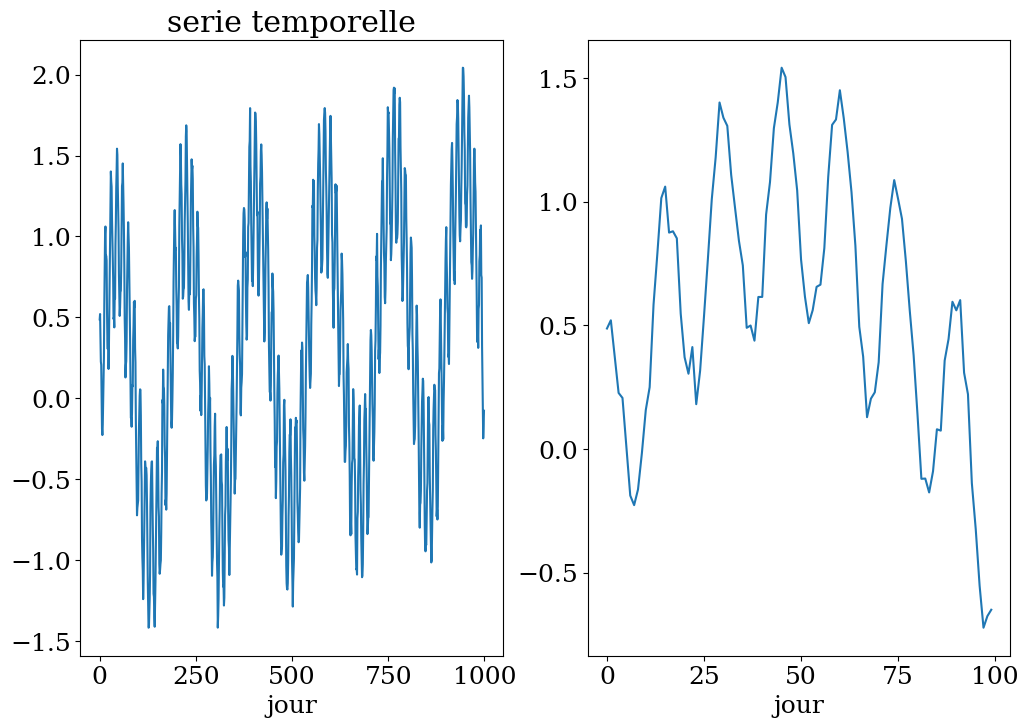

In [5]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(Ts[:],ys)
plt.xlabel("jour")
plt.title("serie temporelle");
plt.subplot(1,2,2)
plt.plot(Ts[:100],ys[:100])
plt.xlabel("jour")

In [7]:
print(0.5, 0, 'jour')

0.5 0 jour


In [ ]:
def dataset(Ts,ys,nav,nap,N,t0):
    # choix d'une fenetre de nav jours précédents pour prédir nap valeurs (i.e. sur nap jours)
    # nav taille de la fenetre d'histoire (avant)
    # nap taille de la fenetre prediction (apres)
    # N nbre de fenetres
    # t0 date de debut prediction
    # 
    t1 = t0 - N - nav -nap
    print(f"apprentissage sur {N} fenetres de {nav}-{nap} jours entre le jour {t1} et {t0}")
    # 
    X  = np.zeros((N,nav))
    y  = np.zeros((N,nap))
    t  = np.zeros(N,dtype=int)
    # construction de la base de données
    for i in range(N):
        X[i,:] = ys[t1+i:t1+i+nav]
        y[i]   = ys[t1+i+nav:t1+i+nav+nap]
        t[i]   = Ts[t1+i+nav]
    return X,y,t

In [ ]:
# N fenetres: de 14 jours -> 7 jours pour prediction à partir du jour t0
nav = 14
nap = 7
#N  = 200
#t0 = 300
N = 400
t0 = 600
X,y,t = dataset(Ts,ys,nav,nap,N,t0)

In [ ]:
X.shape, y.shape, t.shape

In [ ]:
def plot_dataset():
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.plot(t-nav,X[:,0])
    plt.plot(t,y[:,0])
    plt.xlabel("jour")
    plt.ylabel("y")
    plt.title("data apprentissage")
    plt.subplot(1,2,2)
    plt.plot(np.arange(t[0]-nav,t[0]+nap),ys[t[0]-nav:t[0]+nap],'--')
    plt.plot(np.arange(t[0]-nav,t[0]),X[0,:],'or')
    plt.plot(np.arange(t[0],t[0]+nap),y[0,:],'xg')
    plt.plot(np.arange(t[-1]-nav,t[-1]+nap),ys[t[-1]-nav:t[-1]+nap],'--')
    plt.plot(np.arange(t[-1]-nav,t[-1]),X[-1,:],'or')
    plt.plot(np.arange(t[-1],t[-1]+nap),y[-1,:],'xg')
    plt.xlabel("jour")
    plt.title("first/last window");
    return

In [ ]:
plot_dataset()

PROPHET